In [1]:
!pip install -q pytrends matplotlib pandas seaborn

## 1. Kontekst

**18 grudnia 2025**  jeden z najpopularniejszych polskich raperów Taco Hemingway wypuścił album "LATARNIE WSZĘDZIE DAWNO ZGASŁY".

Piosenka *"Zakochałem się pod apteką"* zawiera fragmenty:
> *"Idę rano po solpadeinę"*  
> *"Mówię: prze pani solpa w rozpuszczalnej tabletce"*

**Solpadeine** to lek przeciwbólowy (paracetamol + kodeina + kofeina).

**Kontrowersja:**


*   pojawiły się pogłoski, że fani artysty masowo wykupują lek z aptek
*   sprawą zainteresował się Główny Inspektorat Farmaceutyczny
*   31.01. - pierwsze artykuły w mediach, że GIF zamierza sprawdzić, czy Taco miał prawo do promocji leku
*   03.02 - GIF wszczyna postępowanie




## 2. Pytania badawcze

**Pytanie główne:**

Czy premiera albumu "LATARNIE WSZĘDZIE DAWNO ZGASŁY" i piosenki "Zakochałem się pod apteką" Taco Hemingwaya miała wpływ na wzrost zainteresowania lekiem Solpadeine w Polsce?

**Pytania szczegółowe:**

1. Czy nastąpił wzrost zainteresowania wyszukiwaniem terminu "Solpadeine" (i jego wariantów) po premierze piosenki w porównaniu do okresu przed premierą?

2. Które warianty nazwy leku (Solpadeine, Solpadeina, Solpa) wykazały największy wzrost zainteresowania po premierze utworu?

3. Jakie było natężenie i dynamika zmian zainteresowania wyszukiwaniami związanymi z lekiem w kluczowych momentach: przed premierą albumu, po premierze oraz po interwencji Głównego Inspektoratu Farmaceutycznego?

4. Jaki był kontekst wyszukiwań związanych z Solpadeine (related queries) po premierze utworu - czy użytkownicy szukali informacji o leku, czy raczej o piosence/artyście?

5. Czy zaangażowanie GIF (30 stycznia i 3 lutego 2026) wpłynęło na dodatkowy wzrost zainteresowania tematem?







## 3. Źródło danych

Wszystkie dane pochodzą z wyszukiwań w serwisie Google Trends i obejmują wyłącznie terytorium Polski. Taco Hemingway jest polskojęzycznym raperem i tworzy obecnie w języku polskim

Nazwa oficjalna leku:

* **Solpadeine** – pod tą nazwą funkcjonuje lek, który można kupić w polskich aptekach.

Nazwy w piosence Taco:

Piosenka *„Zakochałem się pod apteką”* zawiera m.in. fragmenty:
> *„Idę rano po solpadeinę”*  
> *„Mówię: prze pani solpa w rozpuszczalnej tabletce”*

Na podstawie tekstu piosenki w analizie uwzględniono także następujące warianty nazwy:

* **Solpadeina** – słuchacz, który wcześniej nie używał tego leku, może uznać tę formę za nazwę handlową, ponieważ w tekście piosenki pojawia się dopełniacz „solpadeinę”.
* **Solpa** – skrócona, potoczna forma nazwy, która również występuje bezpośrednio w piosence.

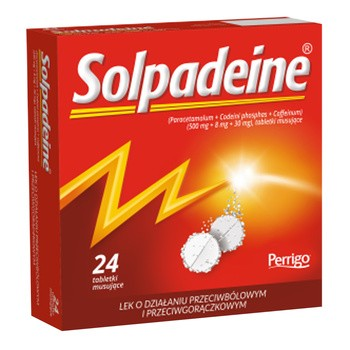





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import time
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11


pytrends = TrendReq(hl='pl-PL', tz=360)

W analizie porównano warianty nazwy leku z wykorzystaniem sumy wskaźnika **interest over time**, rozumianej jako miara łącznego, względnego poziomu zainteresowania danym hasłem w analizowanym okresie. Wskaźnik interest over time ma charakter znormalizowany i nie odzwierciedla bezwzględnej liczby wyszukiwań, dlatego jego zastosowanie ograniczono do porównań różnych wariantów tej samej nazwy w tym samym okresie oraz dla tego samego obszaru geograficznego.

Ze względu na fakt, że od premiery płyty minęło około 7 tygodni, jako okres analizy przyjęto dwa symetryczne przedziały czasowe:
**7 tygodni przed premierą **oraz** 7 tygodni po**

In [3]:
# Analiza interest_over_time 7 tygodni PRZED premierą

terms_to_check = ['Solpadeine', 'Solpadeina', 'Solpa']
timeframe_before_7w = '2025-10-28 2025-12-17'

before_7w_summary = {}

for term in terms_to_check:
    series_data = None

    for attempt in range(3):
        try:
            pytrends.build_payload(
                [term],
                cat=0,
                timeframe=timeframe_before_7w,
                geo='PL',
                gprop=''
            )
            time.sleep(2)
            data = pytrends.interest_over_time()

            if term in data.columns:
                series_data = data[term]
                break
        except Exception:
            time.sleep(3)

    # zapis wyników
    if series_data is not None:
        before_7w_summary[term] = {
            'suma': float(series_data.sum()),
            'srednia': float(series_data.mean())
        }
    else:
        before_7w_summary[term] = {
            'suma': 0.0,
            'srednia': 0.0
        }


print('7 tygodni przed premiera')
print('-' * 50)
print(f'{"Termin":12s} | {"Suma interest":>14s} | {"Średnia":>10s}')
print('-' * 50)

for term, stats in before_7w_summary.items():
    print(
        f'{term:12s} | '
        f'{stats["suma"]:14.0f} | '
        f'{stats["srednia"]:10.2f}'
    )


7 tygodni przed premiera
--------------------------------------------------
Termin       |  Suma interest |    Średnia
--------------------------------------------------
Solpadeine   |            964 |      18.90
Solpadeina   |              0 |       0.00
Solpa        |              0 |       0.00


In [4]:
# Analiza interest_over_time 7 tygodni PO premierze

terms_to_check = ['Solpadeine', 'Solpadeina', 'Solpa']
timeframe_after_7w = '2025-12-18 2026-02-07'

after_7w_summary = {}

for term in terms_to_check:
    series_data = None

    for attempt in range(3):
        try:
            pytrends.build_payload(
                [term],
                cat=0,
                timeframe=timeframe_after_7w,
                geo='PL',
                gprop=''
            )
            time.sleep(2)
            data = pytrends.interest_over_time()

            if term in data.columns:
                series_data = data[term]
                break
        except Exception:
            time.sleep(3)

    # zapis wyników
    if series_data is not None:
        after_7w_summary[term] = {
            'suma': float(series_data.sum()),
            'srednia': float(series_data.mean())
        }
    else:
        after_7w_summary[term] = {
            'suma': 0.0,
            'srednia': 0.0
        }


print('OKRES PO PREMIERZE (7 tygodni)')
print('-' * 50)
print(f'{"Termin":12s} | {"Suma interest":>14s} | {"Średnia":>10s}')
print('-' * 50)

for term, stats in after_7w_summary.items():
    print(
        f'{term:12s} | '
        f'{stats["suma"]:14.0f} | '
        f'{stats["srednia"]:10.2f}'
    )


OKRES PO PREMIERZE (7 tygodni)
--------------------------------------------------
Termin       |  Suma interest |    Średnia
--------------------------------------------------
Solpadeine   |           1474 |      28.35
Solpadeina   |            939 |      18.06
Solpa        |            393 |       7.56


In [5]:
# PORÓWNANIE PRZED vs PO

print('\nPORÓWNANIE PRZED vs PO (7 tygodni)')
print('-' * 65)
print(f'{"Termin":15s} | {"PRZED":>10s} | {"PO":>10s} | {" PO/PRZED":>18s}')
print('-' * 65)

for term in terms_to_check:
    before = before_7w_summary.get(term, {}).get('suma', 0)
    after = after_7w_summary.get(term, {}).get('suma', 0)

    if before > 0:
        ratio = after / before
        ratio_str = f'{ratio:.2f}'
    else:
        ratio_str = 'n/d'

    print(
        f'{term:15s} | '
        f'{before:10.0f} | '
        f'{after:10.0f} | '
        f'{ratio_str:>18s}'
    )



PORÓWNANIE PRZED vs PO (7 tygodni)
-----------------------------------------------------------------
Termin          |      PRZED |         PO |           PO/PRZED
-----------------------------------------------------------------
Solpadeine      |        964 |       1474 |               1.53
Solpadeina      |          0 |        939 |                n/d
Solpa           |          0 |        393 |                n/d


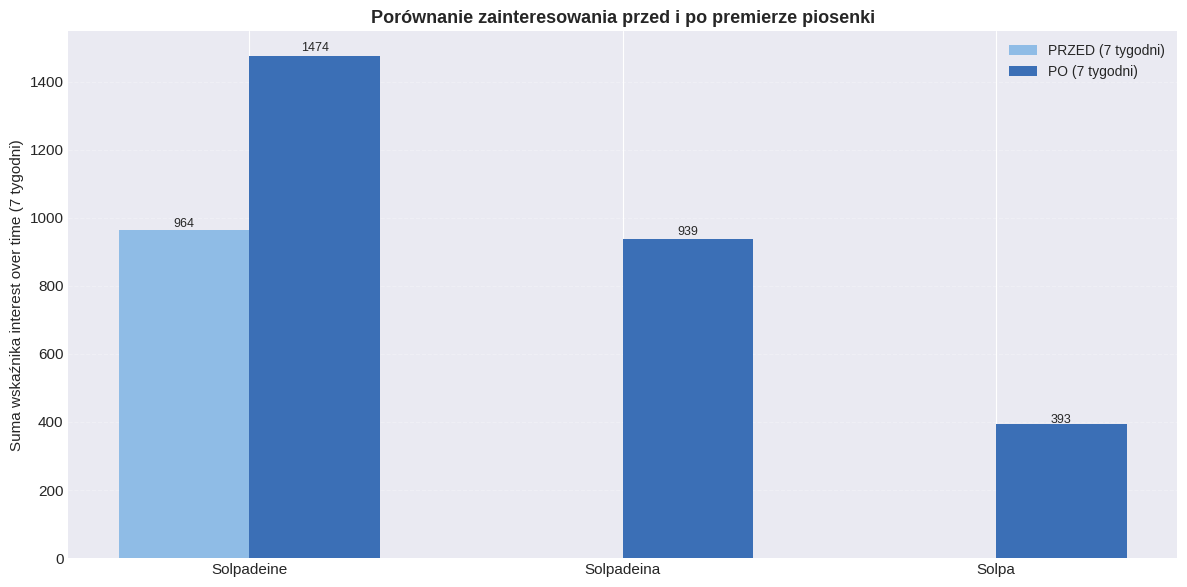

In [6]:
# WYKRES 1: PRZED vs PO (7 tygodni) – jednolita paleta niebieska

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

terms = []
before_vals = []
after_vals = []

for term in terms_to_check:
    before = before_7w_summary.get(term, {}).get('suma', 0)
    after = after_7w_summary.get(term, {}).get('suma', 0)
    terms.append(term)
    before_vals.append(before)
    after_vals.append(after)

x = np.arange(len(terms))
width = 0.35


color_before = '#8FBCE6'
color_after = '#3B6FB6'
bars1 = ax.bar(
    x - width/2,
    before_vals,
    width,
    label='PRZED (7 tygodni)',
    color=color_before
)

bars2 = ax.bar(
    x + width/2,
    after_vals,
    width,
    label='PO (7 tygodni)',
    color=color_after
)

# etykiety wartości
for i, (b, a) in enumerate(zip(before_vals, after_vals)):
    if b > 0:
        ax.text(i - width/2, b * 1.01, f'{b:.0f}', ha='center', fontsize=9)
    if a > 0:
        ax.text(i + width/2, a * 1.01, f'{a:.0f}', ha='center', fontsize=9)

ax.set_ylabel('Suma wskaźnika interest over time (7 tygodni)', fontsize=11)
ax.set_title(
    'Porównanie zainteresowania przed i po premierze piosenki',
    fontsize=13,
    fontweight='bold'
)

ax.set_xticks(x)
ax.set_xticklabels(terms, fontsize=11)
ax.legend(frameon=False, fontsize=10)


ax.grid(axis='y', linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()


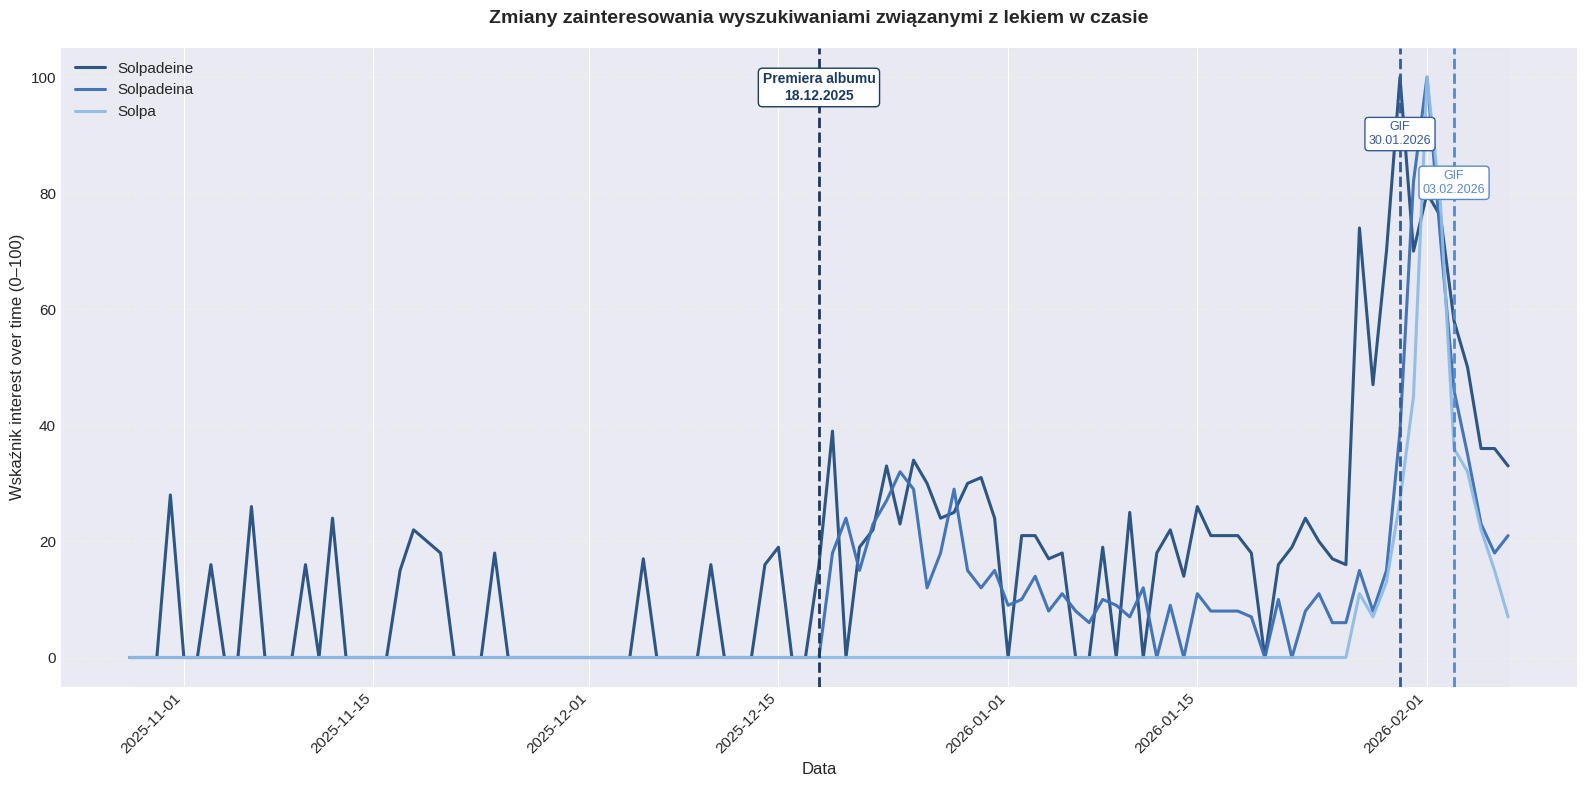

In [8]:
# WYKRES 2: Zmiany zainteresowania w czasie

import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))


timeframe_full = '2025-10-28 2026-02-07'


colors_map = {
    'Solpadeine': '#234E7F',
    'Solpadeina': '#3B6FB6',
    'Solpa':       '#8FBCE6'
}

for term in terms_to_check:
    try:
        pytrends.build_payload([term], cat=0, timeframe=timeframe_full, geo='PL', gprop='')
        time.sleep(2)
        data = pytrends.interest_over_time()

        if term in data.columns:
            if 'isPartial' in data.columns:
                data = data.drop(columns=['isPartial'])

            ax.plot(
                data.index,
                data[term],
                label=term,
                linewidth=2.2,
                color=colors_map.get(term, '#3B6FB6'),
                alpha=0.95
            )
    except Exception:
        pass


premiere_date = pd.Timestamp('2025-12-18')
gif_1_date = pd.Timestamp('2026-01-30')
gif_2_date = pd.Timestamp('2026-02-03')

ymin, ymax = ax.get_ylim()


ax.axvline(premiere_date, linestyle='--', linewidth=2, color='#1B3A5F')
ax.text(
    premiere_date, ymax * 0.96,
    'Premiera albumu\n18.12.2025',
    ha='center', va='top',
    fontsize=10, fontweight='bold',
    color='#1B3A5F',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#1B3A5F')
)
ax.axvline(gif_1_date, linestyle='--', linewidth=2, color='#355C9A')
ax.text(
    gif_1_date, ymax * 0.88,
    'GIF\n30.01.2026',
    ha='center', va='top',
    fontsize=9,
    color='#355C9A',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#355C9A')
)


ax.axvline(gif_2_date, linestyle='--', linewidth=2, color='#5A88C7')
ax.text(
    gif_2_date, ymax * 0.80,
    'GIF\n03.02.2026',
    ha='center', va='top',
    fontsize=9,
    color='#5A88C7',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#5A88C7')
)


ax.axvspan(pd.Timestamp('2025-10-28'), premiere_date, alpha=0.05, color='#E3ECF6')
ax.axvspan(premiere_date, gif_1_date, alpha=0.05, color='#D3E0F0')
ax.axvspan(gif_1_date, gif_2_date, alpha=0.05, color='#C2D3EA')
ax.axvspan(gif_2_date, pd.Timestamp('2026-02-07'), alpha=0.05, color='#B1C6E4')


ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Wskaźnik interest over time (0–100)', fontsize=12)
ax.set_title(
    'Zmiany zainteresowania wyszukiwaniami związanymi z lekiem w czasie',
    fontsize=14,
    fontweight='bold',
    pad=18
)

ax.legend(frameon=False, fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.25)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 4. Analiza kontekstu wyszukiwań

**Related Queries** to frazy najczęściej wyszukiwane razem z danym terminem.

**Typy:**
- **Top Queries:** Najpopularniejsze (wartość 0-100)
- **Rising Queries:** Największy wzrost (wartość = % wzrostu)


In [9]:
# Solpadeine - Related Queries
timeframe_full = '2025-12-18 2026-02-07'

print('SOLPADEINE - Related Queries')
print('='*70)

success = False
for attempt in range(3):
    try:
        if attempt > 0:
            time.sleep(10 * attempt)

        pytrends.build_payload(['Solpadeine'], cat=0, timeframe=timeframe_full, geo='PL', gprop='')
        time.sleep(3)
        related = pytrends.related_queries()

        if 'Solpadeine' in related and related['Solpadeine']['top'] is not None:
            top_df = related['Solpadeine']['top']
            rising_df = related['Solpadeine']['rising'] if related['Solpadeine']['rising'] is not None else pd.DataFrame()

            print(f'\nTOP QUERIES ({len(top_df)}):')
            print(top_df.to_string(index=False))

            if not rising_df.empty:
                print(f'\nRISING QUERIES ({len(rising_df)}):')
                print(rising_df.to_string(index=False))

            success = True
            break
    except:
        pass

if not success:
    print('Za mało wyszukiwań')

SOLPADEINE - Related Queries

TOP QUERIES (11):
                       query  value
              solpadeine max    100
                  solpadeina     42
                     kodeina     37
            solpadeine forte     23
            solpadeine skład     22
             solpadeine cena     15
         solpadeine musujące     12
            solpadeina na co     12
solpadeine tabletki musujące     10
                     nimesil      9
                       solpa      4

RISING QUERIES (4):
           query  value
 solpadeine cena 151650
solpadeina na co 116450
           solpa  36100
      solpadeina    400


In [10]:
# Solpadeina - Related Queries
print('\nSOLPADEINA - Related Queries')

success = False
for attempt in range(3):
    try:
        if attempt > 0:
            time.sleep(10 * attempt)

        pytrends.build_payload(['Solpadeina'], cat=0, timeframe=timeframe_full, geo='PL', gprop='')
        time.sleep(3)
        related = pytrends.related_queries()

        if 'Solpadeina' in related and related['Solpadeina']['top'] is not None:
            top_df = related['Solpadeina']['top']
            rising_df = related['Solpadeina']['rising'] if related['Solpadeina']['rising'] is not None else pd.DataFrame()

            print(f'\nTOP QUERIES ({len(top_df)}):')
            print(top_df.to_string(index=False))

            if not rising_df.empty:
                print(f'\nRISING QUERIES ({len(rising_df)}):')
                print(rising_df.to_string(index=False))

            success = True
            break
    except:
        pass

if not success:
    print('Za mało wyszukiwań')


SOLPADEINA - Related Queries

TOP QUERIES (14):
                          query  value
               co to solpadeina    100
               solpadeina na co     97
                 taco hemingway     93
      zakochałem się pod apteką     65
                        kodeina     47
      zakochalem sie pod apteka     43
                     solpadeine     41
                 solpadeina max     38
            solpadeina tabletki     18
               solpadeina skład     14
zakochałem się pod apteką tekst     12
                      thiocodin     12
                    paracetamol     11
                          solpa      8

RISING QUERIES (5):
                          query  value
                 taco hemingway 548150
      zakochalem sie pod apteka 250900
zakochałem się pod apteką tekst  68600
                      thiocodin  68100
                          solpa  49600


In [11]:
# Solpa - Related Queries
print('\nSOLPA - Related Queries')

success = False
for attempt in range(3):
    try:
        if attempt > 0:
            time.sleep(10 * attempt)

        pytrends.build_payload(['Solpa'], cat=0, timeframe=timeframe_full, geo='PL', gprop='')
        time.sleep(3)
        related = pytrends.related_queries()

        if 'Solpa' in related and related['Solpa']['top'] is not None:
            top_df = related['Solpa']['top']
            rising_df = related['Solpa']['rising'] if related['Solpa']['rising'] is not None else pd.DataFrame()

            print(f'\nTOP QUERIES ({len(top_df)}):')
            print(top_df.to_string(index=False))

            if not rising_df.empty:
                print(f'\nRISING QUERIES ({len(rising_df)}):')
                print(rising_df.to_string(index=False))

            success = True
            break
    except:
        pass

if not success:
    print('Za mało wyszukiwań')


SOLPA - Related Queries
Za mało wyszukiwań


## 5. Prognoza trendu

Na podstawie zebranych danych tworzymy prognozę dalszego rozwoju zjawiska.

### 6.1. Metodologia prognozy

Wykorzystujemy model wykładniczego wygaszania (exponential decay) z uwzględnieniem:
- Piku zainteresowania po premierze (18.12.2025)
- Drugiego piku po ogłoszeniu GIF (03.02.2026)
- Naturalnego spadku zainteresowania trendami viralnymi

**Założenia:**
- Trend viralny trwa średnio 8-12 tygodni
- Połowa życia trendu (half-life): 4 tygodnie
- Stabilizacja na poziomie 20-30% piku dla Solpadeine (stali użytkownicy)
- Stabilizacja na poziomie 10-15% piku dla Solpadeina (nowi użytkownicy stopniowo przestają)

In [12]:


timeframe_14weeks = '2025-10-28 2026-02-07'
terms = ['Solpadeine', 'Solpadeina', 'Solpa']

historical_data = {}

for term in terms:
    success = False
    for attempt in range(3):
        try:
            if attempt > 0:
                time.sleep(5)

            pytrends.build_payload([term], cat=0, timeframe=timeframe_14weeks, geo='PL', gprop='')
            time.sleep(2)
            data = pytrends.interest_over_time()

            if term in data.columns:
                if 'isPartial' in data.columns:
                    data = data.drop(columns=['isPartial'])

                historical_data[term] = data[term].values
                success = True
                break

        except:
            pass

    if not success:
        print('nie udało się pobrać')
        historical_data[term] = None

# konwersja na numpy arrays
solpadeine_historical = historical_data.get('Solpadeine')
solpadeina_historical = historical_data.get('Solpadeina')
solpa_historical = historical_data.get('Solpa')
weeks_historical = np.arange(-7, 8)


### 5.2. Wizualizacja prognozy


### 5.3. Interpretacja wyników prognozy

Prognoza zakłada, że zainteresowanie trendami viralnymi **maleje po osiągnięciu piku** i stopniowo stabilizuje się na poziomie charakterystycznym dla danej frazy.

Model uwzględnia:
- ostatnią obserwowaną wartość,
- poziom stabilizacji,
- tempo spadku zależne od charakteru trendu.

#### Założenia dla fraz

**Solpadeine**
- Stabilizacja blisko poziomu sprzed premiery  
- Wolny spadek  
- Interpretacja: głównie stali użytkownicy, niski efekt viralowy

**Solpadeina**
- Stabilizacja na części poziomu piku  
- Umiarkowany spadek  
- Interpretacja: część nowych użytkowników pozostaje po efekcie piosenki

**Solpa**
- Niski poziom stabilizacji  
- Szybki spadek  
- Interpretacja: krótkotrwały, czysto viralny trend

#### Tempo spadku (half-life)

Założenia oparte na literaturze:
- memy i hashtagi: 1–2 tygodnie,
- produkty popkulturowe: 3–4 tygodnie,
- zmiany zachowań konsumenckich: 4–8 tygodni.

> **Uwaga:** Prognoza zakłada brak dalszych działań komunikacyjnych oraz brak nowych wydarzeń zewnętrznych (BRAK DALSZYCH DZIAŁAŃ GIF).
``


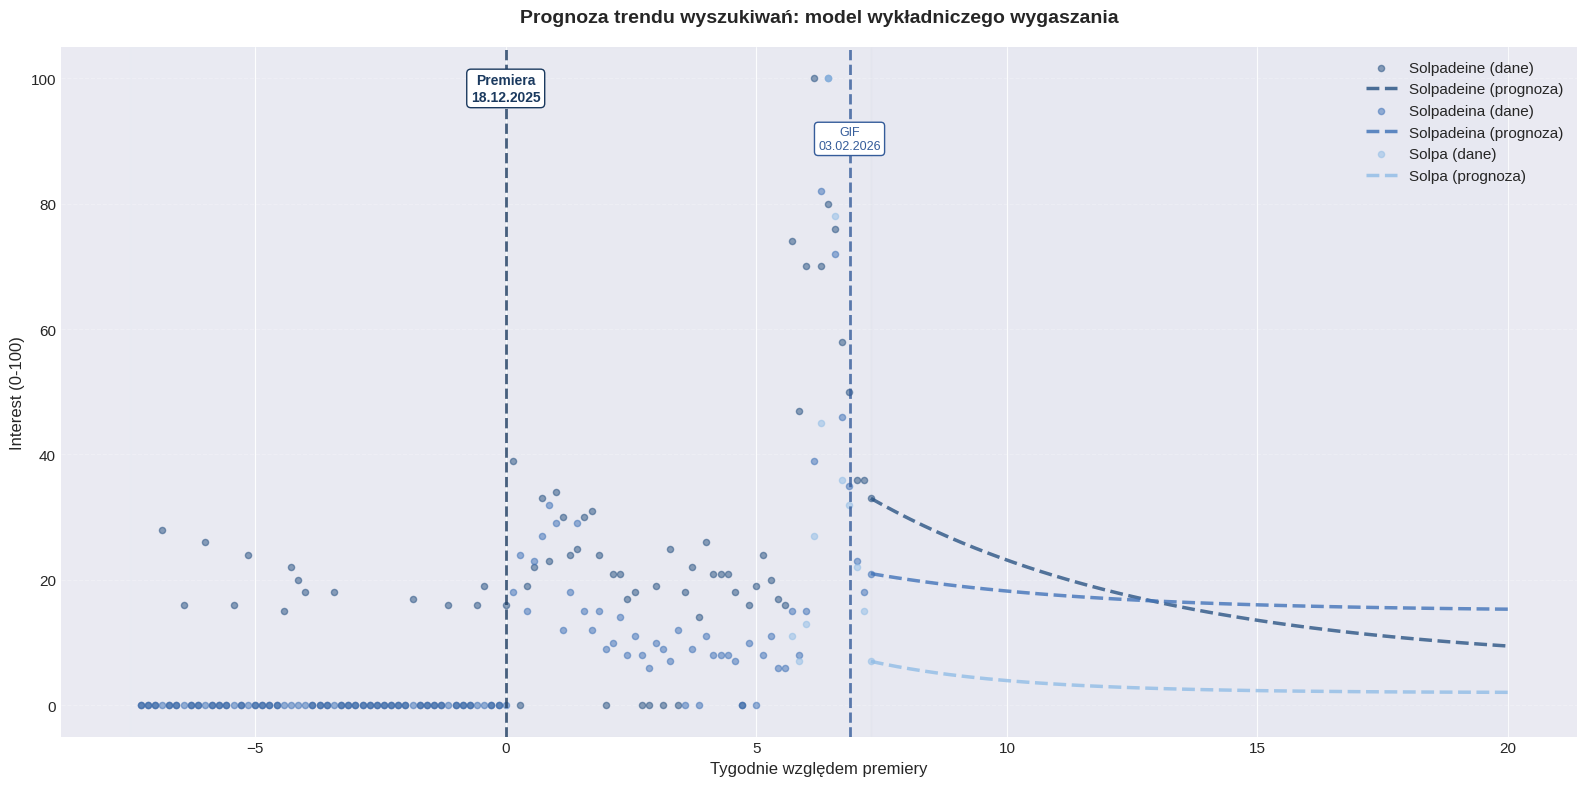

In [13]:

premiere_day = 51
days = np.arange(len(solpadeine_historical))
weeks = (days - premiere_day) / 7
last_week = weeks[-1]


colors_map = {
    'Solpadeine': '#234E7F',
    'Solpadeina': '#3B6FB6',
    'Solpa': '#8FBCE6'
}

fig, ax = plt.subplots(figsize=(16, 8))

# SOLPADEINE
if solpadeine_historical is not None:
    baseline_e = np.mean(solpadeine_historical[:premiere_day])
    last_value_e = solpadeine_historical[-1]
    peak_e = np.max(solpadeine_historical[premiere_day:])
    stable_e = baseline_e * 1.2

    future_weeks = np.linspace(last_week, 20, 50)
    decay_e = (last_value_e - stable_e) * np.exp(-0.17 * (future_weeks - last_week))
    forecast_e = stable_e + decay_e

    ax.scatter(weeks, solpadeine_historical, color=colors_map['Solpadeine'], s=20, alpha=0.5, label='Solpadeine (dane)', zorder=2)
    ax.plot(future_weeks, forecast_e, color=colors_map['Solpadeine'], linewidth=2.5, linestyle='--', label='Solpadeine (prognoza)', alpha=0.8, zorder=1)

# SOLPADEINA
if solpadeina_historical is not None:
    baseline_a = np.mean(solpadeina_historical[:premiere_day])
    last_value_a = solpadeina_historical[-1]
    peak_a = np.max(solpadeina_historical[premiere_day:])
    stable_a = max(baseline_a, peak_a * 0.15)

    future_weeks = np.linspace(last_week, 20, 50)
    decay_a = (last_value_a - stable_a) * np.exp(-0.23 * (future_weeks - last_week))
    forecast_a = stable_a + decay_a

    ax.scatter(weeks, solpadeina_historical, color=colors_map['Solpadeina'], s=20, alpha=0.5, label='Solpadeina (dane)', zorder=2)
    ax.plot(future_weeks, forecast_a, color=colors_map['Solpadeina'], linewidth=2.5, linestyle='--', label='Solpadeina (prognoza)', alpha=0.8, zorder=1)

# SOLPA
if solpa_historical is not None:
    last_value_s = solpa_historical[-1]
    nonzero_mask = solpa_historical > 0

    if np.any(nonzero_mask):
        stable_s = 2
        future_weeks = np.linspace(last_week, 20, 50)
        decay_s = (last_value_s - stable_s) * np.exp(-0.35 * (future_weeks - last_week))
        forecast_s = stable_s + decay_s

        ax.scatter(weeks[nonzero_mask], solpa_historical[nonzero_mask], color=colors_map['Solpa'], s=20, alpha=0.5, label='Solpa (dane)', zorder=2)
        ax.plot(future_weeks, forecast_s, color=colors_map['Solpa'], linewidth=2.5, linestyle='--', label='Solpa (prognoza)', alpha=0.8, zorder=1)

# Wydarzenia
ax.axvline(x=0, color='#1B3A5F', linestyle='--', linewidth=2, alpha=0.8, zorder=3)
ax.text(0, ax.get_ylim()[1] * 0.96, 'Premiera\n18.12.2025', ha='center', va='top',
        fontsize=10, fontweight='bold', color='#1B3A5F',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#1B3A5F'))

ax.axvline(x=6.86, color='#355C9A', linestyle='--', linewidth=2, alpha=0.8, zorder=3)
ax.text(6.86, ax.get_ylim()[1] * 0.88, 'GIF\n03.02.2026', ha='center', va='top',
        fontsize=9, color='#355C9A',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#355C9A'))

# Strefy
ax.axvspan(-7.5, 0, alpha=0.05, color='#E3ECF6')
ax.axvspan(0, last_week, alpha=0.05, color='#D3E0F0')
ax.axvspan(last_week, 20, alpha=0.05, color='#C2D3EA')

ax.set_xlabel('Tygodnie względem premiery', fontsize=12)
ax.set_ylabel('Interest (0-100)', fontsize=12)
ax.set_title('Prognoza trendu wyszukiwań: model wykładniczego wygaszania',
             fontsize=14, fontweight='bold', pad=18)
ax.legend(frameon=False, fontsize=11, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

## 6. Wnioski

### 7.1. Potwierdzenie hipotezy

Premiera piosenki "Zakochałem się pod apteką" Taco Hemingwaya (18.12.2025) spowodowała **istotny wzrost zainteresowania lekiem Solpadeine** w polskim internecie.


### 7.2. Kluczowe ustalenia

1. Największy wzrost dotyczył wariantów nazwy użytych w tekście piosenki ("solpadeina", "solpa")

2. Użytkownicy wyszukiwali lek używając dokładnie tych samych form, które usłyszeli w piosence

3. To nawet nie użycie nazwy leku w piosence, a podanie do wiadomości publicznej informacji o interwencji GIF znacząco zwiększyło zainteresowanie

4. Analiza related i rising queries ujawniła wzrost zapytań zarówno bezpośredno powiązanych z Taco i utworem, jak i "informacyjnych" - takich, które mogły zostać wyszukane po przesłuchaniu piosenki lub usłyszeniu informacji o GIF np. "solpadeina na co"

5. **Dynamika trendu**:
   - Gwałtowny wzrost po premierze
   - Poziom podwyższa się po wiadomości o interwencji GIF
   - Prognoza: stopniowy spadek z różnym tempem dla każdego wariantu
